# Seasonal Cycles in sub-regions

On this notebook we find described the code used to get a plot of the (mean) seasonal cycle of the mixed layer depth in the sub-regions named in the notebook [Regions](./Distribution-regions.ipynb). 

For the sake of brevity, the notebook only considers one example for one of the subregions. This notebook has the following structure:

   [1. Imported modules](#1.-Imported-modules)
   [2. Dictionaries used](#2.-Dictionaries-used)
   [3. Functions](#3.-Functions)
   [4. Example plot](#4.-Example-plot)
    
Figures of this kind can be found in the written report [MLD project](https://www.overleaf.com/read/rmjfbdbbrsbf
), in the Section (1.2), Chapter 6 and the Appendix A. In the case of the figures in the Appendix A, the monthly versions of the seasonal cycle is used. A couple of lines to get this figues are also included.

## 1. Imported modules

In [2]:
#!/bin/python3

#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################


import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import xarray as xr
import numpy as np

import datetime
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## This module disable the print of warnings in the notebook
import warnings; warnings.simplefilter('ignore')

## 2. Dictionaries

In [3]:
"""
subregions is a dictionary that has the coordinate
boundaries of the sub-regions. The format is:
<subregion> :
  <lon> : (lon1, lon2)
  <lat> : (lat1,  lat2)
  <name> : title for an eventual ploting title
"""

subregions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    },
    'nor1': {
        'lon' : (-2, 2),
        'lat' : (73, 76),
        'name' : 'Nordic Sea- Northern'
    },
    'nor2': {
        'lon' : (0, 4),
        'lat' : (68, 71),
        'name' : 'Nordic Sea- Southern'
    }   
}


"""
reg_ext is a dictionary that has the coordinate
boundaries of the main regions. The format is:
<region> :
  <lon> : (lon1, lon2)
  <lat> : (lat1,  lat2)
  <name> : title for an eventual ploting title
"""

reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    },
    'nor':{
        'lon' : (-25, 20),
        'lat' : (65, 80),
        'name' : 'North Atlantic Ocean'
    },
    'noa':{
        'lon' : (-90, 50.),
        'lat' : (10, 85),
        'name' : 'North Atlantic Ocean'
    }
}


## 3. Functions

In [ ]:
## Function to crop the dataset
def Crops(coord, data_set, dic):
    """Crops is a function that takes a data set and crops it into a 
    smaller region, using as parameters the values given by the dictionary. 
        
    Parameters:
    ------------
    coord : string
        Key value that identifies the region to obtain.

    data_set : DataArray
        Dataset to be cropped.

    dic : dictionary
        Dictionary with the boundaries of the regions.

    Output:
    -------
    new_ds : DataArray
        New data array corresponding to the region stated by 'coord'.
    """
    
    lon1, lon2 = dic[coord]['lon']
    lat1, lat2 = dic[coord]['lat']
    name_fig = dic[coord]['name']
    
    new_ds = data_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
    return(new_ds)

## 4. Example plot


This example is done using the ARMOR 3D dataset on the Gulf Stream Extension sub-region. An alternate version for ISAS will be written as comments in the following lines.

In [5]:
###############################################################################
###########         MAIN PROGRAM
###############################################################################

# Directory of ARMOR 3D dataset 
dir_1 = '../../../New_ARMOR/'
# Directory of output -> Figures directory
dir_o = '/home/lgarcia/Documents/Scripts/Images_01/'


# Name of datasets, opening
fl_n1 = 'NARMOR_*.nc'
c_armor = xr.open_mfdataset(dir_1 + fl_n1, concat_dim='time')


# Directory of ISAS dataset
#dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'
#fl_nI = 'ISAS15_DM_2002_2015_MLDS_0.03.nc'
#c_isas = xr.open_dataset(dir_2 + fl_nI, autoclose=True)

In [6]:
## These lines assign the time stamps for each time step
## of the ARMOR 3D dataset. Note that 2018 is not complete.

d1 = datetime.datetime(2005,1,1)
d2 = datetime.datetime(2018,12,20)

weeks = pd.date_range(start=d1, end=d2, freq='7D')
c_armor.coords['time'] = (('time'), weeks)

### Plot: Gulf Stream

In [6]:
coord = 'gul'

## Cropping and selecting the name of the figure
gulf = Crops(coord, c_armor, subregions)

In [7]:
meant_g = gulf.groupby('time.week').mean(dim=('longitude', 'latitude'))    #Mean of the region, time dependent
mini_g =  gulf.groupby('time.week').mean(dim=('longitude', 'latitude', 'time'))   #Time-space mean
styd_g = gulf.groupby('time.week').std(dim=('longitude', 'latitude', 'time'))     #Time-space standar dev

In [8]:
## List of the names for the months, for the plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

<IPython.core.display.Javascript object>


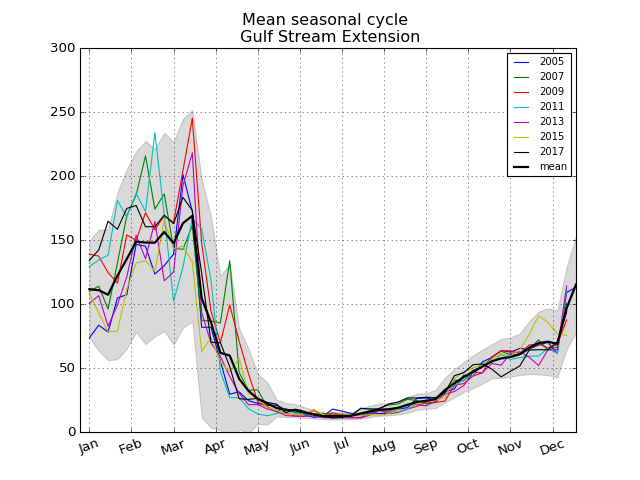

In [9]:
%matplotlib notebook

plt.close()

## Plots of yearly seasonal cycle for each year: 2005-2018
for i in range(2005, 2019, 2):
        vv = meant_g.mlotst.sel(time=slice('01-01-'+str(i),
                                         '31-12-'+str(i))).groupby('time.week').mean(dim='time')
        plt.plot(vv.week.values, vv, label=str(i))
        
## Plot mean seasonal cycle as black line
plt.plot(mini_g.week.values, mini_g.mlotst, label='mean', linestyle='-', color='k', lw=2)

# Plot standard deviation as gray-ish shadows
plt.fill_between(mini_g.week.values, mini_g.mlotst - styd_g.mlotst,
                 mini_g.mlotst + styd_g.mlotst, alpha=0.15, color='k')

## x & y limits of plot
plt.xlim(0, 53)
plt.ylim(0, 300)

## Formating xx labels:month names, and size
plt.xticks(np.arange(1, mini_g.week.size, step=4.5), months, rotation=20)
plt.legend(fontsize=9)

## Title of the figure
plt.title('Mean seasonal cycle \n Gulf Stream Extension')
plt.grid()

## Line to save the Figure
#plt.savefig(dir_o + 'Gul-SeasonalCycle-E.png', bbox_inches='tight')

plt.show()

### The case for Appendix A: monthly means


In this case, because it was needed to make a figure for each one of the datasets (ARMOR 3D and ISAS versions), it was decided to make the plots following a loop over the different datasets for each one of the regions. Here, it is shown just for the Gulf Stream Extension sub-region, and for the ARMOR 3D dataset. 

These plots are realized using only the 2006-2015 period, to capture the same time span for all datasets.

In [10]:
## List of datasets
data_sets = [c_armor.mlotst]
#data_sets = [c_armor.mlotst, c_isas1.MLDP[:,0], c_isas2.MLDP[:,0], c_isas3.MLDP[:,0]]

## List of the identification of each dataset
ds_names = ['ARMOR 3D', 'ISAS-0.030', 'ISAS-0.015', 'ISAS-0.046']

## Name prefix for the figures, identifies the subregion plotted;
## name suffix for the figures, identifies the dataset used.
r = ['Gul', 'Lab', 'Irm', 'Noe', 'Nor1', 'Nor2']
name_sv = ['A', 'ISAS-030', 'ISAS-015', 'ISAS-046']

<IPython.core.display.Javascript object>


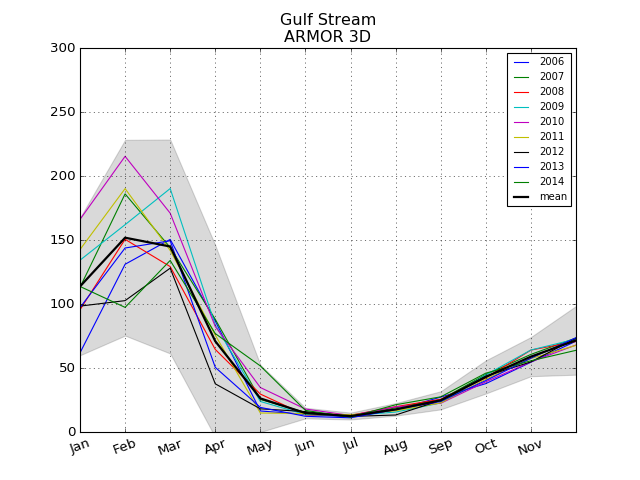

Gul-SC-SR-A.png


In [12]:
## Name of the subregion for the dictionary and 
## prefix to be used for the name.
coord = 'gul'
reg = r[0]

for d,dset in enumerate(data_sets):
    ## Chopping the dataset in the sub-region
    data = Crops(coord, dset, subregions)
    data = data.sel(time=slice('2006-01-01', '2015-12-31'))

    ## Strings for title and save name of figure
    title_fig = subregions[coord]['name'] + '\n' + ds_names[d]
    save_name = reg + '-SC-SR-' + name_sv[d] + '.png'

    mean_g = data.groupby('time.month').mean(dim=('longitude', 'latitude'))    #Mean of the region, time dep.
    mini_g = data.groupby('time.month').mean(dim=('longitude', 'latitude', 'time'))   #Time-space mean
    styd_g = data.groupby('time.month').std(dim=('longitude', 'latitude', 'time'))     #Time-space standar dev

    plt.close()

    for i in range(2006, 2015, 1):
            vv = mean_g.sel(time=slice('01-01-'+str(i),
                                             '31-12-'+str(i))).groupby('time.month').mean(dim='time')
            plt.plot(vv.month.values, vv, label=str(i))

    plt.plot(mini_g.month.values, mini_g, label='mean', linestyle='-', color='k', lw=2)

    plt.fill_between(mini_g.month.values, mini_g - styd_g,
                     mini_g + styd_g, alpha=0.15, color='k')

    plt.xlim(1, 12)
    plt.ylim(0, 300)
    plt.xticks(np.arange(1, mini_g.month.size, step=1), months, rotation=20)
    plt.grid()
    plt.legend(fontsize=9)
    plt.title(title_fig)

    #plt.savefig(dir_o + save_name, bbox_inches='tight')

    plt.show()
    print(save_name)


** Look forward to make a more general function to make these plots